Loading the Dataset

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import seaborn as sns

# Load the Wine dataset
wine = load_wine()

# Print the structure and features of the dataset
print("Feature names:")
print(wine.feature_names)

print("\nTarget names:")
print(wine.target_names)

print("\nFirst 5 rows of data:")
print(wine.data[:5])

print("\nTarget:")
print(wine.target[:178])

print("\nThe shape:")
print(wine.data.shape)



Feature names:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target names:
['class_0' 'class_1' 'class_2']

First 5 rows of data:
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]

Target:
[0 0 0 0 0 0 0 0 0 0

Data Preprocessing

In [ ]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into features and target labels
X = wine.data
y = wine.target

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (178, 13)
Target shape: (178,)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size (features):", X_train.shape)
print("Test set size (features):", X_test.shape)
print("Training set size (target):", y_train.shape)
print("Test set size (target):", y_test.shape)

Training set size (features): (142, 13)
Test set size (features): (36, 13)
Training set size (target): (142,)
Test set size (target): (36,)


Baseline Model

In [ ]:
# Define the kernel functions to experiment with
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    # Train a SVM model
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = clf.predict(X_test)

    # Evaluate the model's performance
    print(f"\nKernel: {kernel}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1-score:", f1_score(y_test, y_pred, average='weighted'))


Kernel: linear
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Kernel: poly
Accuracy: 0.8333333333333334
Precision: 0.8717348927875244
Recall: 0.8333333333333334
F1-score: 0.794334146058284

Kernel: rbf
Accuracy: 0.8055555555555556
Precision: 0.801058201058201
Recall: 0.8055555555555556
F1-score: 0.80242656449553


Data Normalization

In [ ]:
#I have added comments on how I would normalize the data at the data preprocessing tab

Hyperparameter Tuning

In [ ]:
# Define the hyperparameters to tune
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['linear', 'poly', 'rbf']}

# Create a GridSearchCV object
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3)

# Fit the model to the data
grid.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found by grid search:")
print(grid.best_params_)

# Make predictions on the testing set using the best model
y_pred = grid.predict(X_test)

# Evaluate the model's performance
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

Effects of Data Size

In [ ]:
# Define the SVM model
clf = svm.SVC(kernel='linear')

# Define the number of folds for cross-validation
cv_folds = [5, 10, 15, 20, 25, 30]

# Store the average cross-validation score for each number of folds
cv_scores = []

for folds in cv_folds:
    # Perform cross-validation and compute the average score
    scores = cross_val_score(clf, X, y, cv=folds)
    cv_scores.append(np.mean(scores))

# Plot the relationship between training size (number of CV folds) and model performance (CV score)
plt.figure(figsize=(10, 6))
plt.plot(cv_folds, cv_scores, marker='o')
plt.title('Effect of Training Size on Model Performance')
plt.xlabel('Number of CV Folds (Proportional to Training Size)')
plt.ylabel('Average CV Score')
plt.grid(True)
plt.show()

Model Evaluation

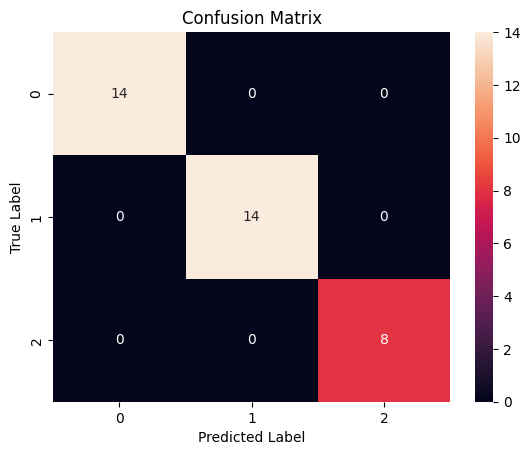

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()